# Facial Feature Detection with OpenFace

[OpenFace github](https://github.com/TadasBaltrusaitis/OpenFace)  
[OpenFace wiki](https://github.com/TadasBaltrusaitis/OpenFace/wiki)


# Install OpenFace

## Windows

[Wiki guide](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Windows-Installation)

1.   Download one of these archives, depending on your system (usually it's 64-bit):  
[32-bit](https://github.com/TadasBaltrusaitis/OpenFace/releases/download/OpenFace_2.2.0/OpenFace_2.2.0_win_x86.zip)  
[64-bit](https://github.com/TadasBaltrusaitis/OpenFace/releases/download/OpenFace_2.2.0/OpenFace_2.2.0_win_x64.zip)
2.   Unzip them  
3.   Go to the unzipped folder and find file `download_models.ps1`, right click and chose excecute with PowerShell, if it asks a prompt, answer Y

For the binaries to work you need to have Visual Studio 2017 installed (search if you have this program) or need to install the 64-bit Visual C++ redistributable package, that can be found [here](https://aka.ms/vs/16/release/vc_redist.x64.exe) - download and run the exe file.

To check if everything works try running `OpenFaceOffline.exe`, it will open an interface, where you can upload a video.

## Mac

[Wiki guide](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Mac-Installation)



1.   Download [this](https://gitlab.com/Thom/fea_tool/-/raw/master/installer_scripts/macOS/openFace.sh?inline=false) script to the directory that you are going to use
2.   In terminal run `bash openFace.sh`

To check if everything works, in the same folder in terminal run `FeatureExtraction.exe -f "C:\my videos\video.avi"`, change the path to your video file.



# Running

Windows users can use the interactive interface by running `OpenFaceOffline.exe`.

Alternatively, there is a command line interface, full description of the commands and arguments is [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Command-line-arguments).

Here are some examples of the commands:


*   Extract all features from a video

`FeatureExtraction.exe -f "C:\my videos\video.avi"`


*   Extract all features from multiple videos

`FeatureExtraction.exe -f "C:\my videos\video0.avi" -f "C:\my videos\video1.avi" -f "C:\my videos\video2.avi"`

*   Specify the output folder, by default it will create `processed` folder

`FeatureExtraction.exe -f "C:\my videos\video.avi" -out_dir "openface_output"`

*   Extract only action units

`FeatureExtraction.exe -f "C:\my videos\video.avi" -aus`


# Exploring data

## Script

In Terminal use command `cd` to change directories

If the links below don't work go to [this github](https://github.com/kuzanna2016/OpenFace_non_manuals_utils/tree/main)  and download them manually  


[Here](https://drive.google.com/u/0/uc?id=1ITksUhPJtRLm-pbdQQ42lmqb6oGGBG8T&export=download) you can download the requirements to run the scripts.

After downloading run `pip install -r requirements.txt`

[Here](https://drive.google.com/file/d/18P8bMEiXfmw8b9yGhr8fM55SvmMcijjJ&export=download) you can download the script that will turn the OpenFace output to the ELAN-readable table with AUs presence.

[Here](https://drive.google.com/u/0/uc?id=18P8bMEiXfmw8b9yGhr8fM55SvmMcijjJ&export=download) you can download the script that will plot the intensities.

To see help with the arguments run:

`python convert_to_elan_format.py --help`


To run the scripts in the terminal run for example:

`python convert_to_elan_format.py -f "OpenFace results/Jens_Befehl_ANRUFEN.csv"`

or

`python draw_intensity.py -f "OpenFace results/Jens_Befehl_ANRUFEN.csv" --aus 1 4`

The only non-default argument is `-f` - a path to a OpenFace result file or folder with those results. If you use the `--folder` argument make sure that in that folder there are only OpenFace results and not other `.csv` files.



### How to open the Elan files

Open your ELAN file, go to `File` -> `Import` -> `CSV / Tab-delimeted text file`

Then for each column choose the function (`Tier`, `Begin time`, `End time`, `Annotation`)

Don't forget to also start from the 2nd row, to not read the header.

## Notebook

This is a very useful way to use Google Drive with Colab to not upload and download files everytime.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
folder_with_results = '/content/drive/MyDrive/OpenFace_tutorial/OpenFace results'
file_name = 'Jens_Befehl_ANRUFEN'
df = pd.read_csv(f'{folder_with_results}/{file_name}.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
df.set_index('frame', inplace=True, append=True)
df.reset_index(level=[1], inplace=True)
df.drop(labels=['face_id'], inplace=True,  axis=1)
df.head()

,frame,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0.00,0.98,1,0.480184,-0.002594,-0.877164,0.334057,0.028199,-0.942131,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.04,0.93,1,0.459541,-0.012845,-0.888063,0.319554,0.023489,-0.947277,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.08,0.93,1,0.462583,0.018291,-0.886387,0.326412,0.069448,-0.942673,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.12,0.98,1,0.464709,0.045865,-0.884275,0.334195,0.099134,-0.937276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.16,0.93,1,0.464059,0.057714,-0.883922,0.335677,0.111314,-0.935377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
au_presence_columns = df.columns.values[-18:]
au_intensity_columns = df.columns.values[-35:-18]

In [ ]:
au_presence_columns

array(['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c',
       'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c',
       'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c'],
      dtype=object)

### Save AUs to import in Elan

We can import tab-delimeted files in Elan as new tiers. [Here](https://www.mpi.nl/corpus/html/elan/ch01s04s02.html#Sec_Importing_CSV_Tab-delimited_Text_Files) is the Elan documentation on it.

To import it we need to change the layout of the table.

In [ ]:
melted_df = df.melt(id_vars=['frame','timestamp'], value_vars=au_presence_columns, var_name='tier', value_name='presence')

# Filter out the rows where 'presence' is 0
melted_df = melted_df[melted_df['presence'] == 1]

# Find consecutive spans of frames for each action unit
melted_df['consecutive_group'] = (melted_df['frame'].diff() != 1).cumsum()

# Calculate the start and end time for each action unit
start_end_df = melted_df.groupby(['tier', 'consecutive_group']).agg(start=('timestamp', 'min'), end=('timestamp', 'max')).reset_index()

# Merge start and end times back into the dataframe
final_df = melted_df.merge(start_end_df, on=['tier', 'consecutive_group'])

# # Remove duplicates and unnecessary columns
final_df = final_df.drop_duplicates(subset=['tier', 'start', 'end'])
final_df = final_df[['tier', 'start', 'end']]
final_df['annotation'] = ""
final_df.head()

,tier,start,end,annotation
0,AU01_c,0.00,0.16,
5,AU01_c,3.56,3.88,
14,AU02_c,0.00,0.16,
19,AU02_c,0.48,0.68,
25,AU02_c,0.96,1.28,


If you want the AU names to be human readable create a mapping from index to name and run the cell:

In [ ]:
index_to_name = {
    'AU01_c': 'inner brow raiser',
    'AU02_c': 'outer brow raiser',
    'AU04_c': 'brow Lowerer',
    'AU05_c': 'Upper Lid Raiser',
    'AU09_c': 'Nose Wrinkler',
    'AU10_c': 'Upper Lip Raiser',
    'AU12_c': 'Lip Corner Puller',
    'AU15_c': 'Lip Corner Depressor',
    'AU17_c': 'Chin Raiser',
    'AU20_c': 'Lip Stretcher',
    'AU23_c': 'Lip Tightener',
    'AU25_c': 'Lip Part',
    'AU26_c': 'Jaw Drop',
    'AU45_c': 'Blink',
}
final_df['tier'] = final_df['tier'].replace(index_to_name)

In [ ]:
# Save the new table
final_df.to_csv(f'{folder_with_results}/{file_name}_aus.csv')

### Plot the intensities

<Axes: xlabel='timestamp'>

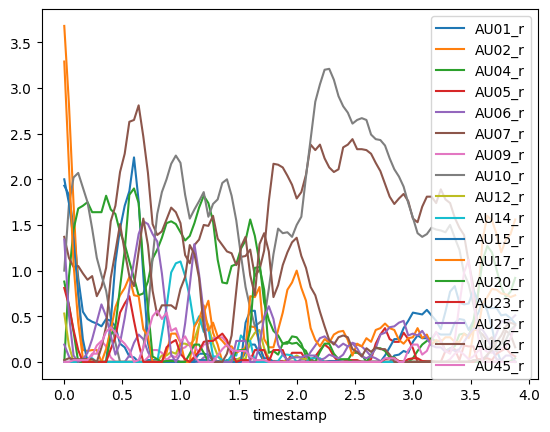

In [ ]:
# All aus
df.plot(x='timestamp', y=au_intensity_columns)

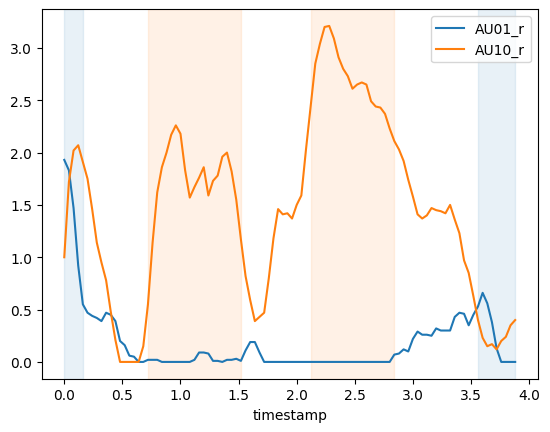

In [ ]:
# Choose aus to plot
aus = ['AU01','AU10']
cmap = plt.get_cmap('tab10')
fig, ax = plt.subplots(1,1)
df.plot(ax=ax, x='timestamp', y=[f'{u}_r' for u in aus])

# plot also presence as a span (need final_df for this)
for i, (tier, start, end, _) in final_df.iterrows():
    if tier[:4] in aus:
        c = cmap(aus.index(tier[:4]))
        ax.axvspan(start, end, color=c, label=tier, alpha=0.1)

# Py-Feat

In [ ]:
!pip install py-feat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 113.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 122.5 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [ ]:
from feat import Detector
from tqdm.notebook import tqdm

# Initialize the default detector
detector = Detector(device='cuda')
folder_with_videos = '/content/drive/MyDrive/OpenFace_tutorial/OpenFace videos'
videos = []
# Loop over and process each video and save results to csv
for video in tqdm(os.listdir(folder_with_videos)):
    videos.append(video[:-4])
    video_fp = f'{folder_with_videos}/{video}'
    out_name = video_fp.replace(".mp4", ".csv")
    if not os.path.exists(out_name):

        print(f"Processing: {video}")

        # This is the line that does detection!
        fex = detector.detect_video(video_fp)

        fex.to_csv(out_name, index=False)

  0%|          | 0/16 [00:00<?, ?it/s]

## Explore one file

In [ ]:
from feat.utils.io import read_feat

fex = read_feat(f'{folder_with_videos}/Jens_Bitte_ANRUFEN.csv')
fex.head()

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,AU43,anger,disgust,fear,happiness,sadness,surprise,neutral,input,frame
0,250.549000,146.925716,94.344092,122.793662,0.998341,248.724024,252.252591,256.393590,261.733827,269.101997,...,0.054743,0.076357,0.013690,0.002455,0.152439,0.087914,0.016060,0.651085,/content/drive/MyDrive/OpenFace_tutorial/OpenF...,0
1,250.734807,147.387857,94.354274,122.638259,0.998144,248.864911,252.331372,256.438452,261.761987,269.099746,...,0.105430,0.069873,0.034020,0.003509,0.121951,0.142528,0.019263,0.608856,/content/drive/MyDrive/OpenFace_tutorial/OpenF...,1
2,250.411769,146.848410,94.624067,123.095566,0.998369,248.746324,252.260613,256.413105,261.748057,269.129021,...,0.014116,0.077022,0.021778,0.003742,0.124350,0.155347,0.015285,0.602477,/content/drive/MyDrive/OpenFace_tutorial/OpenF...,2
3,250.528460,147.019796,95.016514,122.675324,0.998263,248.636761,252.034088,256.082670,261.317631,268.527075,...,0.138402,0.062361,0.022457,0.003297,0.135521,0.133923,0.023042,0.619398,/content/drive/MyDrive/OpenFace_tutorial/OpenF...,3
4,250.693490,147.096085,95.061598,122.631529,0.998283,248.195640,251.665115,255.779030,261.060343,268.374722,...,0.103880,0.065928,0.033143,0.004845,0.113568,0.173497,0.030417,0.578601,/content/drive/MyDrive/OpenFace_tutorial/OpenF...,4


<Axes: xlabel='frame'>

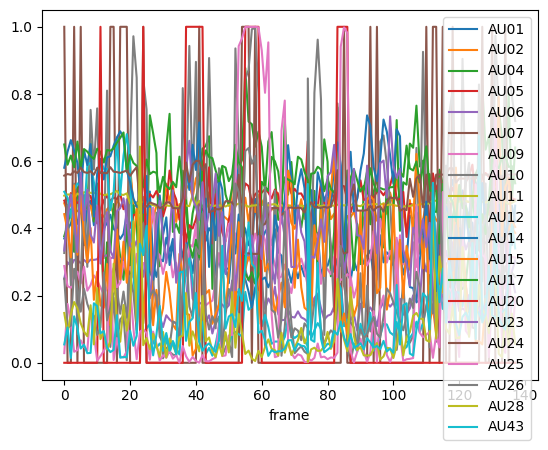

In [ ]:
fex.plot(x='frame', y=fex.aus.columns)

<Axes: xlabel='frame'>

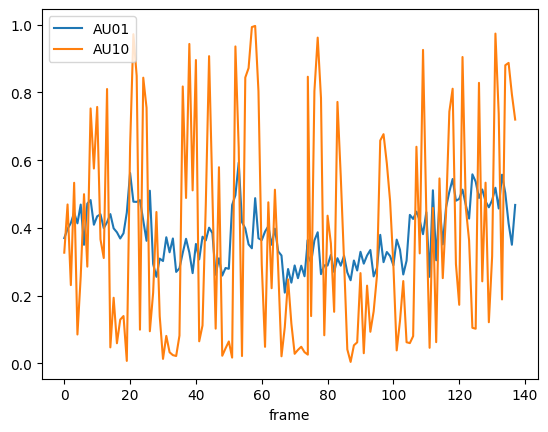

In [ ]:
fex.plot(x='frame', y=['AU01', 'AU10'])

## Compare multiple files

In [ ]:
from feat.utils.io import read_feat

fex = pd.concat(map(lambda video: read_feat(os.path.join(folder_with_videos, f"{video}.csv")), videos))
fex['input'] = fex['input'].replace(r'/.*/', r'', regex=True)
print(f"Unique videos: {fex.inputs.nunique()}")
print(f"Total processed frames: {fex.shape[0]}")
print(f"Avg frames per video: {fex.groupby('input').size().mean()}")

Unique videos: 8
Total processed frames: 2032
Avg frames per video: 254.0


In [ ]:
by_video = fex.update_sessions(fex["input"])

# Compute the mean per video
video_means = by_video.extract_mean()
video_means.head()

,mean_FaceRectX,mean_FaceRectY,mean_FaceRectWidth,mean_FaceRectHeight,mean_FaceScore,mean_x_0,mean_x_1,mean_x_2,mean_x_3,mean_x_4,...,mean_AU28,mean_AU43,mean_anger,mean_disgust,mean_fear,mean_happiness,mean_sadness,mean_surprise,mean_neutral,mean_frame
Jens_Befehl_ANRUFEN.mp4,262.428833,155.338371,93.537984,124.397323,0.994503,257.118840,262.256269,268.279466,275.960821,286.401054,...,0.060509,0.081975,0.638455,0.018834,0.014738,0.001126,0.188370,0.053871,0.084607,48.500000
Jens_Befehl_BACKEN.mp4,264.144292,146.903654,94.791840,124.439997,0.995522,259.710931,264.762009,270.504941,277.589442,286.964175,...,0.074523,0.125208,0.532609,0.020777,0.008578,0.000807,0.192687,0.039527,0.205015,72.000000
Jens_Bitte_ANRUFEN.mp4,258.704771,151.684383,92.084357,123.813831,0.989675,254.257570,257.385550,261.390745,266.969306,275.399693,...,0.099478,0.129397,0.381659,0.012426,0.009651,0.029739,0.200615,0.164494,0.201416,68.539568
Jens_Bitte_BACKEN.mp4,254.826318,155.721627,93.448022,125.553747,0.993559,248.869618,253.318088,258.591256,265.538546,275.682072,...,0.090020,0.128684,0.369628,0.024336,0.003719,0.319171,0.055105,0.065957,0.162082,56.500000
Jens_Erlaubnis_ANRUFEN.mp4,262.116877,149.268557,93.970951,124.255507,0.993673,255.352276,260.530914,266.473881,274.001383,284.575459,...,0.083619,0.114638,0.560139,0.003719,0.003493,0.008018,0.070990,0.125327,0.228314,64.000000


<Axes: title={'center': 'Mean value of AU43 in all videos'}>

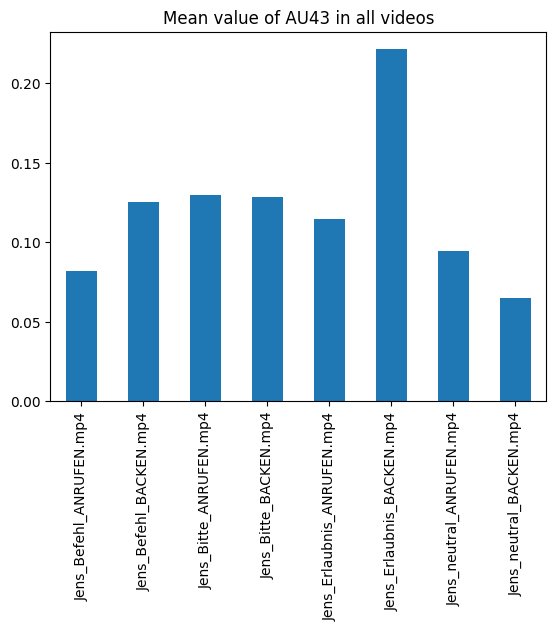

In [ ]:
video_means.mean_AU43.plot(kind='bar', title='Mean value of AU43 in all videos')

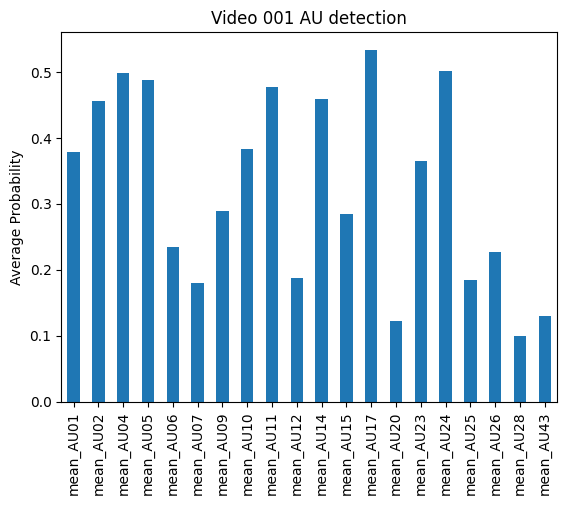

In [ ]:
# Grab the aus just for video 1
video001_aus = video_means.aus.loc[f'{folder_with_videos}/{videos[0]}.mp4']

# Plot them
ax = video001_aus.plot(kind='bar', title='Video 001 AU detection');
ax.set(ylabel='Average Probability');

# Facetorch

In [ ]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install facetorch>=0.2.1

!pip list | grep facetorch
!wget -O ./gpu.config.yml https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/conf/merged/gpu.merged.config.yaml

Python 3.10.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
facetorch                     0.3.0
--2023-06-13 08:26:48--  https://raw.githubusercontent.com/tomas-gajarsky/facetorch/main/conf/merged/gpu.merged.config.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12962 (13K) [text/plain]
Saving to: ‘./gpu.config.yml’

./gpu.config.yml    100%[===================>]  12.66K  --.-KB/s    in 0.001s  

2023-06-13 08:26:48 (21.8 MB/s) - ‘./gpu.config.yml’ saved [12962/12962]



In [ ]:
from facetorch import FaceAnalyzer
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision
import cv2
import os
from tqdm.notebook import tqdm
import json

In [ ]:
path_config="gpu.config.yml"
cfg = OmegaConf.load(path_config)

In [ ]:
folder_with_videos = '/content/drive/MyDrive/OpenFace_tutorial/OpenFace videos'
video_name = 'Jens_Befehl_ANRUFEN'
video_path = f"{folder_with_videos}/{video_name}.mp4"
folder_with_frames = f'/content/drive/MyDrive/OpenFace_tutorial/OpenFace frames/{video_name}'
os.makedirs(folder_with_frames, exist_ok=True)
os.makedirs(folder_with_frames + '_faces', exist_ok=True)

Turn video into frames images

In [ ]:
cam = cv2.VideoCapture(video_path)
currentframe = 0
while(True):
    # reading from frame
    ret, frame = cam.read()

    if ret:
        # if video is still left continue creating images
        name = os.path.join(folder_with_frames, str(currentframe) + '.jpg')
        # writing the extracted images
        cv2.imwrite(name, frame)
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Analyze frames

In [ ]:
analyzer = FaceAnalyzer(cfg.analyzer)

{"asctime": "2023-06-13 08:28:02,924", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2023-06-13 08:28:02,926", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2023-06-13 08:28:02,945", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2023-06-13 08:28:03,209", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2023-06-13 08:28:03,227", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2023-06-13 08:28:03,229", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
Downloading...
From: https://drive.google.com/uc?&id=19h3kqar1wlELAmM5hDyj9tlrUh8yjrCl&confirm=t
To: /code/models/torchscript/predictor/embed/1/model.pt
100%|██████████| 114M/114M [00:01<00:00, 113MB/s]
{"asctime": "2023-06-13 08:28:05,166", "levelname": "INFO", "message": "Initializing FacePredictor verify"}
Downloading...
From: https://drive.google.com/uc?&id=1WI-mP_0mGW31OHfriPUsuF

In [ ]:
labels = """
        - inner_brow_raiser
        - outer_brow_raiser
        - brow_lowerer
        - upper_lid_raiser
        - cheek_raiser
        - lid_tightener
        - nose_wrinkler
        - upper_lip_raiser
        - nasolabial_deepener
        - lip_corner_puller
        - sharp_lip_puller
        - dimpler
        - lip_corner_depressor
        - lower_lip_depressor
        - chin_raiser
        - lip_pucker
        - tongue_show
        - lip_stretcher
        - lip_funneler
        - lip_tightener
        - lip_pressor
        - lips_part
        - jaw_drop
        - mouth_stretch
        - lip_bite
        - nostril_dilator
        - nostril_compressor
        - left_inner_brow_raiser
        - right_inner_brow_raiser
        - left_outer_brow_raiser
        - right_outer_brow_raiser
        - left_brow_lowerer
        - right_brow_lowerer
        - left_cheek_raiser
        - right_cheek_raiser
        - left_upper_lip_raiser
        - right_upper_lip_raiser
        - left_nasolabial_deepener
        - right_nasolabial_deepener
        - left_dimpler
        - right_dimpler
"""
labels = [l.replace('-','').strip() for l in labels.split()]
labels = [l for l in labels if l]
len(labels)

41

In [ ]:
aus = {}
frame_images = {}
for frame_fp in tqdm(os.listdir(folder_with_frames)):
    frame = int(os.path.splitext(frame_fp)[0])
    path = os.path.join(folder_with_frames, frame_fp)
    response = analyzer.run(
            path_image=path,
            include_tensors=True,
            return_img_data=True,
            path_output=os.path.join(folder_with_frames + '_faces', frame_fp)
        )
    frame_images[frame] = response.img
    aus[frame] = response.faces[0].preds['au'].other['multi']

  0%|          | 0/98 [00:00<?, ?it/s]

{"asctime": "2023-06-13 08:28:16,172", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2023-06-13 08:28:16,174", "levelname": "INFO", "message": "Reading image", "path_image": "/content/drive/MyDrive/OpenFace_tutorial/OpenFace frames/Jens_Befehl_ANRUFEN/0.jpg"}
{"asctime": "2023-06-13 08:28:16,210", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2023-06-13 08:28:16,446", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2023-06-13 08:28:16,447", "levelname": "INFO", "message": "Unifying faces"}
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %416 : int = prim::profile_ivalue(%out_dtype.1)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias paramet

Combine all results

In [ ]:
facetorch_folder = folder_with_results + '_facetorch'
os.makedirs(facetorch_folder, exist_ok=True)
with open(os.path.join(facetorch_folder, video_name+'.csv'), 'w') as f:
    f.write('frame;'+';'.join(labels)+'\n')
    for frame, au in sorted(aus.items(), key=lambda x:x[0]):
        f.write(f'{frame};'+';'.join('1' if l in au else '0' for l in labels) + '\n')